In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
import openpyxl
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('ecom.xlsx' , sheet_name='py')

In [4]:
print(data.head())

   Age  Gender Department   Position  Salary  Team Communication  \
0    1    Male  Marketing    Analyst       2                  13   
1    4  Female         IT    Manager       3                  13   
2    1    Male         IT    Analyst       2                  18   
3    1  Female  Marketing     Intern       1                  10   
4    3    Male         IT  Team Lead       3                   8   

   Inclusivity & Diversity  Employee Growth  Work-Life Balance  \
0                       14               11                  9   
1                       14                7                  7   
2                       13                8                  7   
3                       19                8                  6   
4                       10               16                  6   

   Ethical Practices  ...  Leadership Empowerment  Culture Satisfaction Score  \
0                 10  ...                       3                          74   
1                 10  ...       

In [5]:
print(data.isnull().sum())

Age                                  0
Gender                               0
Department                           0
Position                             0
Salary                               0
Team Communication                   0
Inclusivity & Diversity              0
Employee Growth                      0
Work-Life Balance                    0
Ethical Practices                    0
Innovation & Creativity              0
Customer Focus                       0
Eco-friendly                         0
Leadership Empowerment               0
Culture Satisfaction Score           0
HCRI                                 0
BARS                                 0
Tasks Completed                      0
Employee Hours                       0
Productivity Per Employee            0
Compensation Satisfaction Score      0
Analysis                           197
Values                             197
dtype: int64


In [6]:

## CULTURE SATISFACATION


In [7]:
## Group data by Department and calculate mean satisfaction
department_satisfaction = data.groupby('Department')['Culture Satisfaction Score'].mean()

In [8]:
## Group data by Position and calculate mean satisfaction
position_satisfaction = data.groupby('Position')['Culture Satisfaction Score'].mean()

In [9]:
## Group data by Gender and calculate mean satisfaction
gender_satisfaction = data.groupby('Gender')['Culture Satisfaction Score'].mean()


Satisfaction by Department:
Department
Finance      74.097561
HR           75.562500
IT           76.421053
Marketing    73.666667
Sales        76.000000
Name: Culture Satisfaction Score, dtype: float64


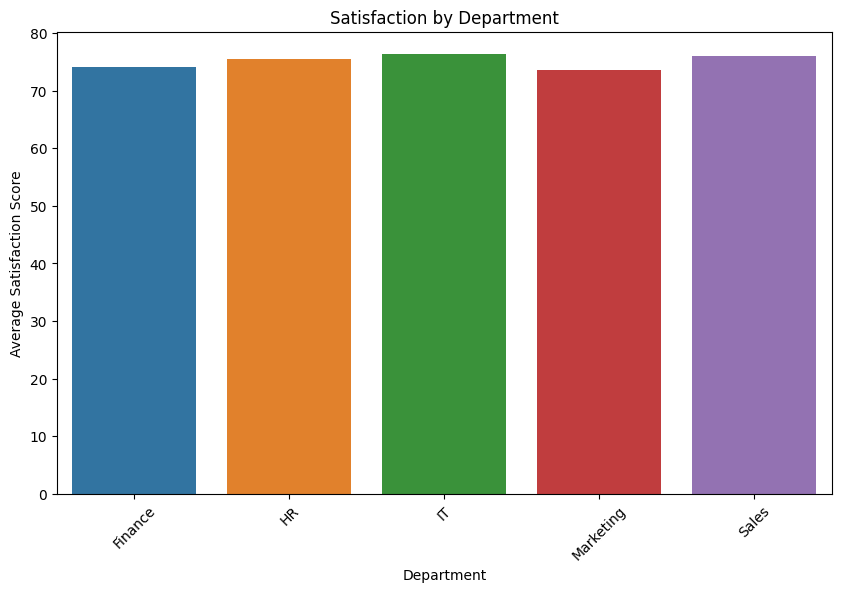

In [10]:
print("\nSatisfaction by Department:")
print(department_satisfaction)
plt.figure(figsize=(10, 6))
sns.barplot(x=department_satisfaction.index, y=department_satisfaction.values)
plt.title('Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.show()


Satisfaction by Position:
Position
Analyst       75.272727
Employee      75.771429
Intern        75.333333
Manager       74.575000
Supervisor    74.966667
Team Lead     74.937500
Name: Culture Satisfaction Score, dtype: float64


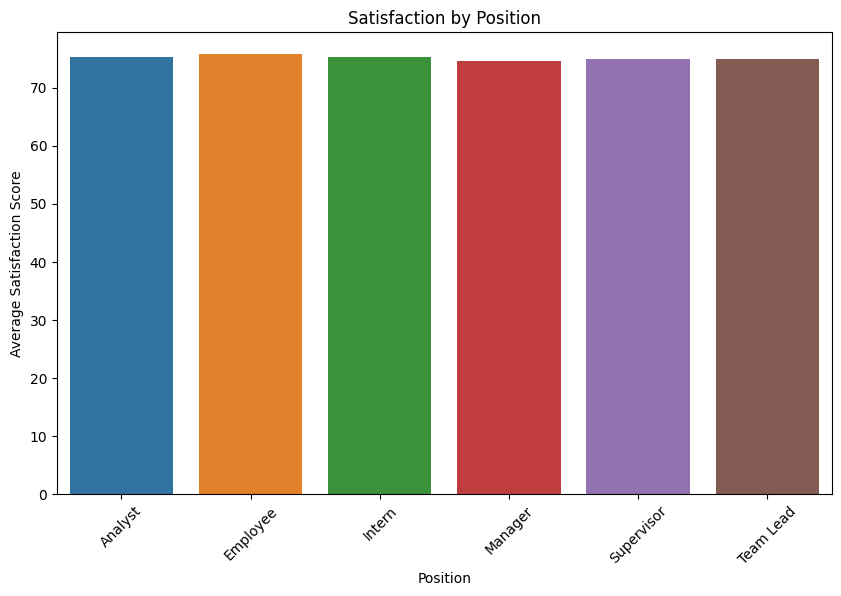

In [11]:
print("\nSatisfaction by Position:")
print(position_satisfaction)
plt.figure(figsize=(10, 6))
sns.barplot(x=position_satisfaction.index, y=position_satisfaction.values)
plt.title('Satisfaction by Position')
plt.xlabel('Position')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.show()


Satisfaction by Gender:
Gender
Female    75.44
Male      74.82
Name: Culture Satisfaction Score, dtype: float64


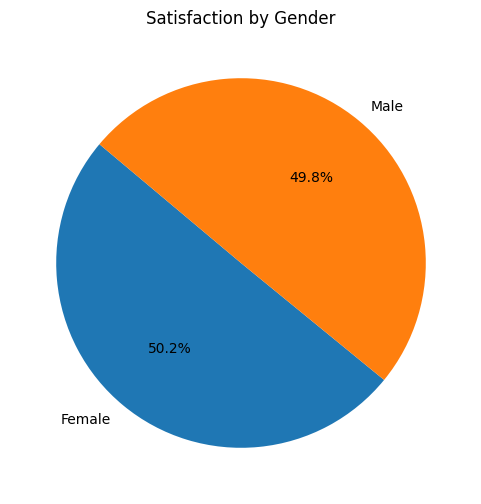

In [12]:
print("\nSatisfaction by Gender:")
print(gender_satisfaction)
labels = ['Female', 'Male']
sizes = [50, 50]  
plt.figure(figsize=(6, 6))
plt.pie(gender_satisfaction, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Satisfaction by Gender')
plt.show()

In [13]:
# Initialize LabelEncoders for each categorical column

categorical_columns = ['Gender', 'Department', 'Position', 'BARS']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
print(data.head())

   Age  Gender  Department  Position  Salary  Team Communication  \
0    1       1           3         0       2                  13   
1    4       0           2         3       3                  13   
2    1       1           2         0       2                  18   
3    1       0           3         2       1                  10   
4    3       1           2         5       3                   8   

   Inclusivity & Diversity  Employee Growth  Work-Life Balance  \
0                       14               11                  9   
1                       14                7                  7   
2                       13                8                  7   
3                       19                8                  6   
4                       10               16                  6   

   Ethical Practices  ...  Leadership Empowerment  Culture Satisfaction Score  \
0                 10  ...                       3                          74   
1                 10  ...       

In [14]:
# Drop Unnecessary Columns

dat = ['Age', 'Gender', 'Department', 'Position', 'Salary', 'HCRI', 'BARS', 'Analysis', 'Values']
dat = data.drop(columns=dat)

In [15]:
# Correlation - Satisfaction Score

print("\nSatisfaction Score - correlation\n")
correlations = dat.corr()['Culture Satisfaction Score'].sort_values(ascending=False)

print(correlations)


Satisfaction Score - correlation

Culture Satisfaction Score         1.000000
Inclusivity & Diversity            0.477853
Ethical Practices                  0.469009
Team Communication                 0.383888
Customer Focus                     0.362764
Innovation & Creativity            0.347375
Work-Life Balance                  0.251541
Eco-friendly                       0.233427
Leadership Empowerment             0.205692
Employee Growth                    0.156880
Productivity Per Employee         -0.017661
Tasks Completed                   -0.054274
Employee Hours                    -0.083474
Compensation Satisfaction Score   -0.088889
Name: Culture Satisfaction Score, dtype: float64


In [16]:
# Overall Satisfaction Score

emp_satisfaction = data['Culture Satisfaction Score'].mean()
print(f"\n\nOverall Satisfaction: {emp_satisfaction:.2f}")



Overall Satisfaction: 75.13


In [17]:
## Spearmann Correlation between each category

print("\nCorrelation & P_value:\n")

correlation, p_value = spearmanr(data['Employee Growth'], data['Inclusivity & Diversity'])
print(f"Employee & Diversity - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(data['Employee Growth'], data['Work-Life Balance'])
print(f"Employee Growth & Work-Life Balance - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(data['Ethical Practices'], data['Customer Focus'])
print(f"Ethical & Customer Focus - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(data['Team Communication'], data['Innovation & Creativity'])
print(f"Team & Creativity - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(data['Inclusivity & Diversity'], data['Leadership Empowerment'])
print(f"Diversity &  Leadership - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")


Correlation & P_value:

Employee & Diversity - Correlation: -0.13  P_value: 0.06
Employee Growth & Work-Life Balance - Correlation: -0.08  P_value: 0.28
Ethical & Customer Focus - Correlation: 0.07  P_value: 0.36
Team & Creativity - Correlation: 0.05  P_value: 0.46
Diversity &  Leadership - Correlation: 0.09  P_value: 0.23


In [18]:
# Calculate the correlation matrix
df = ['Analysis', 'Values', 'Tasks Completed', 'Employee Hours']
df = data.drop(columns=df)

correlation_matrix = df.corr()

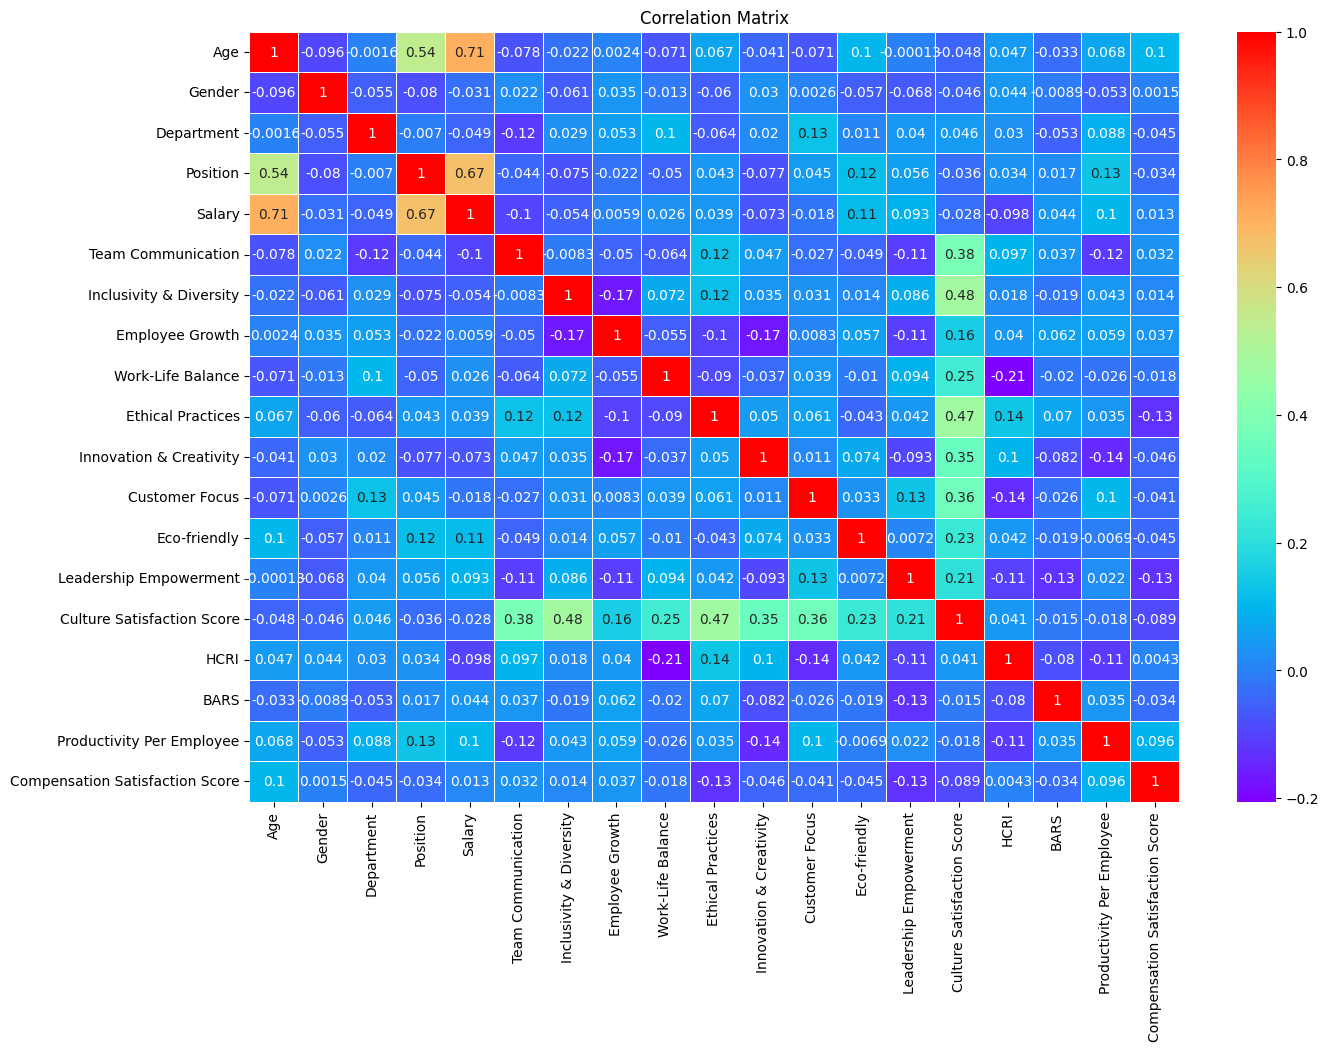

In [19]:
#Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
## COMPETENCY ANALYSIS


In [21]:
# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr( data['Culture Satisfaction Score'], data['HCRI'] )

# Print the correlation coefficient and its significance
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

# Determine if the correlation is significant (common significance level is 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: 0.04
P-value: 0.56
The correlation is not statistically significant.


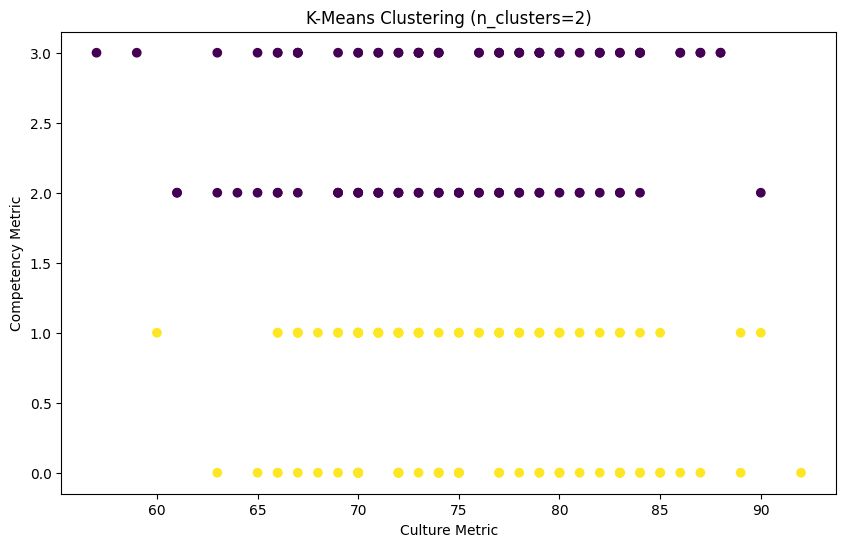

In [22]:
# Clustering

X = data[['Culture Satisfaction Score', 'BARS']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Specify the number of clusters 
n_clusters = 2

# Create and fit a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_std)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Visualize the clusters (optional)
plt.figure(figsize=(10, 6))
plt.scatter(data['Culture Satisfaction Score'], data['BARS'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Culture Metric')
plt.ylabel('Competency Metric')
plt.title(f'K-Means Clustering (n_clusters={n_clusters})')
plt.show()

In [23]:
## Count of employees in each level 

category_counts = data[['BARS']].value_counts().sort_index()
total_count = category_counts.sum()
for category, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"Count of {category}: {count} ({percentage:.2f}%)")

Count of (0,): 49 (24.50%)
Count of (1,): 53 (26.50%)
Count of (2,): 45 (22.50%)
Count of (3,): 53 (26.50%)


In [24]:
# Split the dataset into features (X) and target labels (y)
X = data[['Culture Satisfaction Score', 'HCRI']]
y = data['BARS']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (Gaussian Naive Bayes)
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.325
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.12      0.60      0.20         5
           2       1.00      0.10      0.18        10
           3       0.70      0.54      0.61        13

    accuracy                           0.33        40
   macro avg       0.58      0.35      0.31        40
weighted avg       0.64      0.33      0.34        40



In [25]:
# Inference of Bayes' Theorem Classification:

# Class 0 has relatively good precision but lower recall.
# Class 1 has low precision but higher recall.
# Class 2 has perfect precision but very low recall.
# Class 3 has decent precision and recall.

In [26]:
## Cost and Productivity Analysis

# Split the data into features (X) and the target variable (y)
X = data[['Culture Satisfaction Score', 'HCRI', 'BARS']]  
y = data['Compensation Satisfaction Score']  

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

                      Feature  Importance
1                        HCRI    0.462350
0  Culture Satisfaction Score    0.383638
2                        BARS    0.154012


In [27]:
## Cost-benefit Analysis

workbook = openpyxl.load_workbook('ecom.xlsx')
worksheet = workbook['py']

Revenue_Per_Employee = worksheet.cell(row=2, column=23)
Cost_Per_Employee = worksheet.cell(row=3, column=23)
No_of_employees = worksheet.cell(row=4, column=23)

rev = Revenue_Per_Employee.value
num = No_of_employees.value
cost = Cost_Per_Employee.value

In [28]:
# Calculate Total Revenue
Total_Revenue = rev * num

# Calculate Total Cost
Total_Cost = cost * num

# Calculate Net Benefit
Cost_Benefit = Total_Revenue - Total_Cost

print("\nCost Benefit: ")
print(Cost_Benefit)


Cost Benefit: 
34580596.0


In [29]:
## Recruitment Analysis

new_hire = pd.read_excel('ecom.xlsx' , sheet_name='new_hire')

In [30]:
# Initialize LabelEncoders for each categorical column

categorical_columns = ['Gender', 'Department', 'Position', 'Sourcing Channel', 'Type of Training', 'Performance Rating']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    new_hire[column] = le.fit_transform(new_hire[column])
    label_encoders[column] = le
print(new_hire.head())

   No of Hires   Employee Name                         Email  Age  Gender  \
0         50.0    Jessica Tate    tiffany89@morse-newman.com   35       1   
1          NaN     Dawn Martin       millermichael@perez.com   20       1   
2          NaN  Alejandro Rice  ajohnson@mathews-cordova.net   26       1   
3          NaN   Matthew Moran           jeffrey62@casey.com   28       0   
4          NaN      Kim Larson         lorraine89@santos.com   25       1   

   Department  Position  Salary  Recruitng Cost (30000)  \
0           1         4   41714                   19811   
1           4         5   24748                   25133   
2           1         1   16326                   16623   
3           3         0   18922                   14788   
4           4         5   28254                   19224   

   Induction Program Cost (20000)  ...  Type of Training  Hours of Training   \
0                           13385  ...                 1                   3   
1                     

In [31]:
## Correlation Analysis

print("\nCorrelation & P_value:\n")

correlation, p_value = spearmanr(new_hire['Sourcing Channel'], new_hire['Time to Fill(Days 10)'])
print(f"Sourcing Channel & Time to Fill - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(new_hire['Sourcing Channel'], new_hire['New Hires performance satisfaction (100)'])
print(f"Sourcing Channel & Performance satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")


Correlation & P_value:

Sourcing Channel & Time to Fill - Correlation: 0.14  P_value: 0.33
Sourcing Channel & Performance satisfaction - Correlation: 0.01  P_value: 0.93


In [32]:
## Feature Importance Analysis

# Split the data into features (X) and the target variable (y)
X = new_hire[['Time to Fill(Days 10)', 'New Hires performance satisfaction (100)', 'Performance Differential']]  
Y = new_hire['Sourcing Channel']  

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
model.fit(X, Y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

                                    Feature  Importance
1  New Hires performance satisfaction (100)    0.455576
0                     Time to Fill(Days 10)    0.289699
2                  Performance Differential    0.254725


In [33]:
## Training and development Analysis

## Correlation Analysis

print("\nCorrelation & P_value:\n")

correlation, p_value = spearmanr(new_hire['Employee Training Satisfaction'], new_hire['Hours Satisfaction'])
print(f"Employee Training Satisfaction & Hours Satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(new_hire['Employee Training Satisfaction'], new_hire['Content Satisfaction'])
print(f"Employee Training Satisfaction & Content Satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(new_hire['Employee Training Satisfaction'], new_hire['Skill Development'])
print(f"Employee Training Satisfaction & Skill Development - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(new_hire['Employee Training Satisfaction'], new_hire['Knowledge Level'])
print(f"Employee Training Satisfaction & Knowledge Level - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")


Correlation & P_value:

Employee Training Satisfaction & Hours Satisfaction - Correlation: 0.31  P_value: 0.03
Employee Training Satisfaction & Content Satisfaction - Correlation: -0.41  P_value: 0.00
Employee Training Satisfaction & Skill Development - Correlation: 0.05  P_value: 0.76
Employee Training Satisfaction & Knowledge Level - Correlation: -0.10  P_value: 0.49


In [34]:
## Correlation for recruitment and training

hire = new_hire[['Content Satisfaction', 'Skill Development', 'Knowledge Level', 'Hours Satisfaction', 'Sourcing Channel', 'New Hires performance satisfaction (100)','Employee Training Satisfaction']]

correlation_matrix = hire.corr()

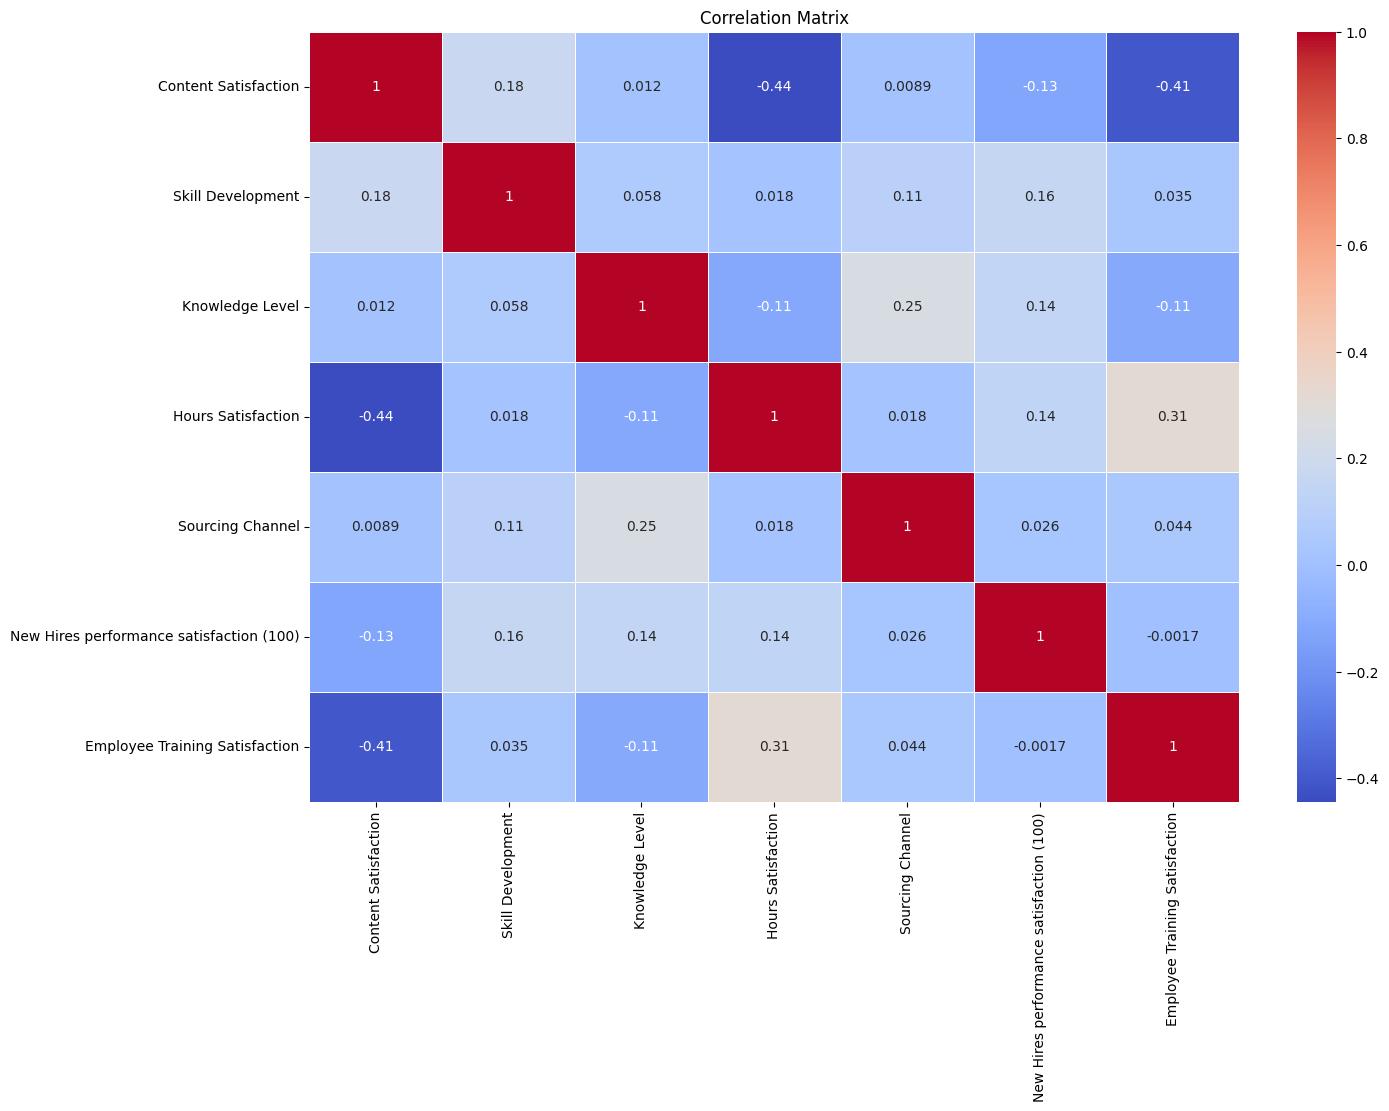

In [35]:
#Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [36]:
## Performance Management

td = pd.read_excel('ecom.xlsx' , sheet_name='total_data')

In [37]:
# Drop Unnecessary Columns

emp = ['Name', 'Email']
dat = td.drop(columns=emp)

In [38]:
# Initialize LabelEncoders for each categorical column

categorical_columns = ['Gender', 'Department', 'Position', 'BARS', 'Performance Rating', 'Experience in Years', 'Status']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    td[column] = le.fit_transform(td[column])
    label_encoders[column] = le
print(td.head())

               Name                            Email  Age  Gender  Department  \
0   Douglas Lindsey       melissasanchez@hoffman.biz   25       1           3   
1  Anthony Roberson            iclayton@shepherd.com   59       0           2   
2     Thomas Miller           johnsonmaria@smith.com   30       1           2   
3      Joshua Lewis  travisbrooks@graham-spencer.com   26       0           3   
4  Stephanie Bailey              timothy05@page.info   43       1           2   

   Position  Salary  Culture Satisfaction Score  HCRI  BARS  ...  \
0         0   63596                          74    98     5  ...   
1         3  112540                          74    34     4  ...   
2         0   66292                          83    85     5  ...   
3         1   38303                          83    87     6  ...   
4         5  101133                          79    64     7  ...   

   Performance Rating  Experience in Years  Status  \
0                   0                    8       0

In [39]:
## Correlation Analysis

print("\nCorrelation & P_value:\n")

correlation, p_value = spearmanr(new_hire['Performance Rating'], new_hire['Sourcing Channel'])
print(f"Performance Rating & Sourcing Channel - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(new_hire['Performance Rating'], new_hire['Hours Satisfaction'])
print(f"Performance Rating & Hours Satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(new_hire['Performance Rating'], new_hire['Employee Training Satisfaction'])
print(f"Performance Rating & Employee Training Satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")


Correlation & P_value:

Performance Rating & Sourcing Channel - Correlation: -0.14  P_value: 0.35
Performance Rating & Hours Satisfaction - Correlation: -0.08  P_value: 0.60
Performance Rating & Employee Training Satisfaction - Correlation: 0.06  P_value: 0.68


In [40]:
## Count of High and Low Performers

higher_perform_emp = len(td[td['Performance Rating'] == 0])
print(higher_perform_emp)

lower_perform_emp = len(td[td['Performance Rating'] == 1])
print(lower_perform_emp)

medium_perform_emp = len(td[td['Performance Rating'] == 2])
print(medium_perform_emp)

87
85
79


In [41]:
# Calculate the percentages
total_employees = len(td)
high_percentage = (higher_perform_emp/ total_employees) * 100
medium_percentage = (medium_perform_emp / total_employees) * 100
low_percentage = (lower_perform_emp / total_employees) * 100

# Print the percentages
print(f'Percentage of High Performers: {high_percentage:.2f}%')
print(f'Percentage of Medium Performers: {medium_percentage:.2f}%')
print(f'Percentage of Low Performers: {low_percentage:.2f}%')

Percentage of High Performers: 34.66%
Percentage of Medium Performers: 31.47%
Percentage of Low Performers: 33.86%


In [42]:
## Talent Management

## Relationship between Performance Rating and Retention Rate

In [43]:
# Calculate the correlations
correlation_hp_rr = td['High Performer'].corr(td['Retention Rate'])
correlation_lp_rr = td['Low Performer'].corr(td['Retention Rate'])
correlation_hp_tr = td['High Performer'].corr(td['Turnover_ratio'])
correlation_lp_tr = td['Low Performer'].corr(td['Turnover_ratio'])
correlation_satisfaction_rr = td['Overall Employee Satisfaction'].corr(td['Retention Rate'])

# Print the correlation coefficients
print(f'Correlation between High Performer and Retention Rate: {correlation_hp_rr:.2f}')
print(f'Correlation between Low Performer and Retention Rate: {correlation_lp_rr:.2f}')
print(f'Correlation between High Performer and Turnover Ratio: {correlation_hp_tr:.2f}')
print(f'Correlation between Low Performer and Turnover Ratio: {correlation_lp_tr:.2f}')
print(f'Correlation between Employee Satisfaction and Retention Rate: {correlation_satisfaction_rr:.2f}')


Correlation between High Performer and Retention Rate: 0.13
Correlation between Low Performer and Retention Rate: -0.01
Correlation between High Performer and Turnover Ratio: -0.00
Correlation between Low Performer and Turnover Ratio: -0.05
Correlation between Employee Satisfaction and Retention Rate: -0.05


In [44]:
## Inference

#High performers tend to have a slightly higher retention rate, meaning they are more likely to stay with the company
#low performers do not significantly impact the retention rate, as the correlation is close to zero
#high performers and the turnover ratio are not related in a meaningful way
#low performers might be associated with a slightly higher turnover ratio, meaning they may be more likely to leave the company
#as employee satisfaction decreases, the retention rate may also decrease slightly, indicating that less satisfied employees are somewhat more likely to leave the company